by Jacinto Paulo Neto

# BOLTZMANN EQUATION FOR WIMP DARK MATTER

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.special import kn
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}') 

In [13]:
# Functions
def s(x):
    return (2 * np.pi**2 / 45) * gstar * mchi**3 * x**-3

def H(x):
    return np.sqrt(np.pi**2 * gstar / 90) * mchi**2 / (Mp * x**2)

def Yeq(x):
    return (45 / (4 * np.pi**4)) * (gchi /gstar) * x**2 * kn(2, x)

# Boltzmann equation
def boltzmann_eq(x, Y, sigmav):
    Yeqx = Yeq(x)
    return -s(x) * sigmav / (x * H(x)) * (Y**2 - Yeqx**2)

In [17]:
# Constants
mchi = 100.0  # GeV
Mp = 2.435e18  # 2.435x10^18 GeV
gchi = 4;  gstar = 106.8 #;g_star_s = 106.8

In [39]:
#  Annihilation cross-sections 
sigmav_values = [1e-10,1e-9, 1e-8]#, 1e-7] # GeV^{-2}

# Initial conditions and integration range
xinit = 1e-2; xend = 1e4; Y0 = Yeq(xinit)  

# Solving the differential equation for each cross-section
xvalues = np.logspace(np.log10(xinit), np.log10(xend), 10000)
solutions = {}

for sigmav in sigmav_values:
    #sol = solve_ivp(boltzmann_eq, [xinit, xend], [Y0], args=(sigmav,), t_eval=xvalues, method='BDF', atol=1e-12, rtol=1e-12)
    #solutions[sigmav] = sol.y[0]
    sol = solve_ivp(boltzmann_eq, [xinit, xend], [Y0], args=(sigmav,), dense_output=True, method='BDF', atol=1e-12, rtol=1e-12)
    Yvalues = sol.sol(xvalues)[0]
    solutions[sigmav] = Yvalues


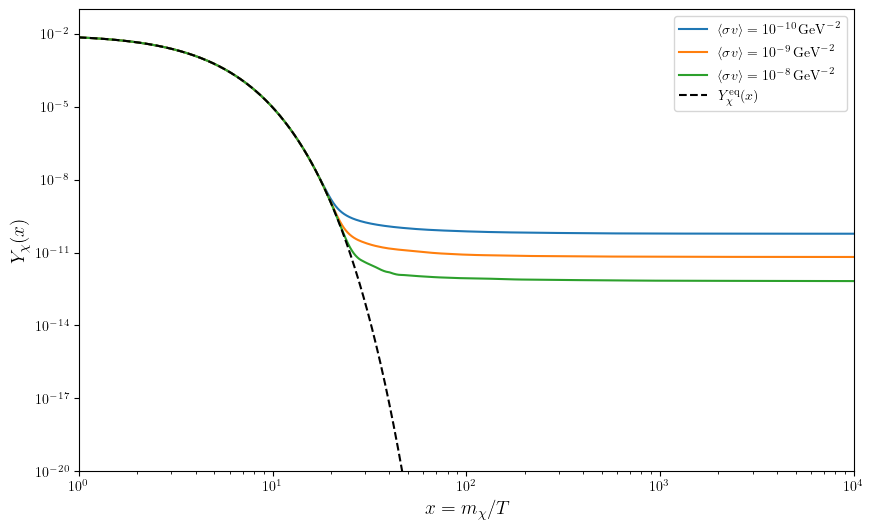

In [41]:
# Plotting the solution
plt.figure(figsize=(10, 6))

for sigmav in sigmav_values:
    if(sigmav == 1e-10):
        plt.plot(xvalues, solutions[sigmav], label=r'$\langle \sigma v \rangle =10^{-10} \, {\rm GeV}^{-2}$')
    if(sigmav == 1e-9):
        plt.plot(xvalues, solutions[sigmav], label=r'$\langle \sigma v \rangle =10^{-9} \, {\rm GeV}^{-2}$')
    if(sigmav == 1e-8):
        plt.plot(xvalues, solutions[sigmav], label=r'$\langle \sigma v \rangle =10^{-8} \, {\rm GeV}^{-2}$')

plt.plot(xvalues, Yeq(xvalues), label=r'$Y_\chi^{\rm eq}(x)$', linestyle='--', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$x = m_\chi / T$', fontsize=14)
plt.ylabel(r'$Y_\chi(x)$',fontsize=14)
plt.xlim(1,1e4)
plt.ylim(1e-20,1e-1)
plt.legend()
plt.savefig('WIMPDM-BEQ.pdf')
plt.show()